In [42]:
import pandas as pd
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt
import math
from typing import Tuple

### Part A

In [22]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

# To the owners of the hotel: your choice of omitting meaningful feature labels is incredibly unhelpful.

# Attempting to decipher the provided data, along with the utterly unhelpful lack of named features given

I would appreciate it if you were to provide me with actual feature names for your dataset
instead of merely 'F1, F2, F3...', as, with the feature names given, it would cut down on any
unnecessary timewasting 'deciphering which feature is which'. This would be mutually beneficial,
as it would allow me to easily work out how to best normalize values for each feature,
discuss any relevant information gained by each feature, and, when the final model is being demonstrated,
it will be easier for you to understand what the model is doing, as you won't have to remember what
F1, F2, F3... actually are supposed to mean.

Furthermore, it indicates an unwillingness to work cooperatively with me, and I fear that this
lack of a constructive working relationship may result in similarly non-ideal outcomes for both of us.

In [23]:
all_data: pd.DataFrame = pd.read_csv("CE802_P2_Data.csv")
all_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,3.8490,2.9620,-190.500,3163.97,14.448000,1775.070,1,7410.604,-13415.52,0,...,24.821,14.1740,7.4220,-1381.62,6.93780,3600.24,775.900,1.9011,NaN,True
1,3.6792,4.7180,-177.570,1163.87,11.027628,1179.270,0,7422.872,-14671.92,1,...,21.782,10.9442,6.8502,-1318.12,6.56130,3523.04,804.980,2.2173,NaN,False
2,4.3035,2.4680,-193.920,1155.93,15.231000,1343.670,1,7259.700,-12901.92,1,...,12.284,10.2526,9.3520,-1318.32,5.32809,4573.64,865.670,1.3770,-9.38,True
3,6.5220,8.6280,-166.548,1281.57,11.011309,877.932,1,7397.640,-11732.82,0,...,13.075,9.8132,6.5904,-1579.72,10.69800,3343.95,723.427,4.7820,NaN,False
4,7.6500,1.0264,-197.540,954.77,11.521500,636.870,1,9476.220,-11194.44,0,...,25.762,9.3566,6.9936,-768.72,6.14040,3708.24,47.070,2.6286,-11.32,True


In [24]:
all_data.dtypes

F1       float64
F2       float64
F3       float64
F4       float64
F5       float64
F6       float64
F7         int64
F8       float64
F9       float64
F10        int64
F11      float64
F12      float64
F13      float64
F14      float64
F15      float64
F16      float64
F17      float64
F18      float64
F19      float64
F20      float64
F21      float64
Class       bool
dtype: object

##Attempting to get an overview of the data ranges etc of the features, and seeing if there's any obvious correlations between them and the labels

Once again, proper label names would have been useful here, but noooooooooooooo, you didn't give me any.

In [39]:
_all_data_inputs = all_data.loc[:, all_data.columns != 'Class'].to_numpy()
_all_data_classes = all_data.loc[:, 'Class'].to_numpy()
print(_all_data_inputs.shape, _all_data_classes.shape)


(1000, 21) (1000,)


In [ ]:
def np_labels_and_classes(df: pd.DataFrame, classnames: str = "Class") -> Tuple[np.ndarray, np.ndarray]:
    """
    Converts dataframe into a couple of
    :param df:
    :param classnames:
    :return:
    """

    inputs:  np.ndarray = df.loc[:,df.columns != classnames].to_numpy()
    outputs: np.ndarray = df.loc[:,classnames].to_numpy()

    return inputs, outputs


In [43]:


def show_all_data_inputs_labels(inputs_np: np.ndarray, labels_np: np.ndarray, all_columns, rows = 3, row_height=2, wh_ratio = 4/3) -> plt.Figure:
    total_cols = inputs_np.shape[1]
    cols = math.ceil(total_cols/rows)
    newplot: plt.Figure = plt.figure(figsize=(math.ceil(cols * row_height * wh_ratio), rows * row_height))

    for i in range(total_cols):
        ax: plt.Axes = newplot.add_subplot(rows, cols, i+1)
        ax.scatter(labels_np, inputs_np[:,i])
        ax.set_xticks([0,1])
        ax.set_title(all_columns[i])

    return newplot


''

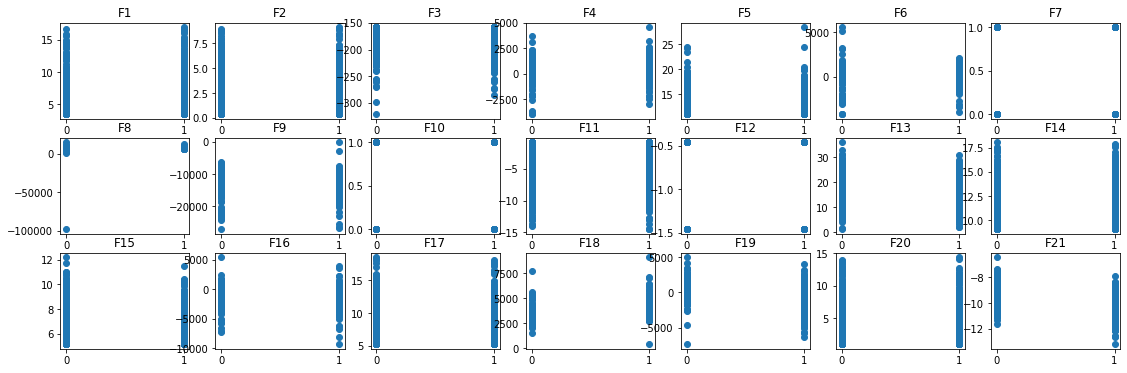

In [44]:
show_all_data_inputs_labels(_all_data_inputs, _all_data_classes, all_data.columns)

""

In [113]:
def show_all_data_curves(inputs_np: np.ndarray, labels_np: np.ndarray, all_columns, sorting = True, rows = 3, row_height=2, wh_ratio = 4/3, show_all_details = True) -> plt.Figure:
    t_data: np.ndarray = inputs_np[labels_np]
    f_data: np.ndarray = inputs_np[~labels_np]

    total_cols = inputs_np.shape[1]
    cols = math.ceil(total_cols/rows)

    actual_rows = rows * (3 if show_all_details else 1)

    newplot: plt.Figure = plt.figure(figsize=(math.ceil(cols * row_height * wh_ratio), actual_rows * row_height))

    for i in range(total_cols):
        ax: plt.Axes = newplot.add_subplot(actual_rows, cols, i+1)
        this_sort: np.ndarray = np.sort(inputs_np[:,i]) if sorting else inputs_np[:,i]
        ax.scatter([i for i in range(len(this_sort))], this_sort)
        ax.set_xticks([],[])
        ax.set_title(all_columns[i] + " All")

    if show_all_details:
        for i in range(total_cols):
            ax: plt.Axes = newplot.add_subplot(actual_rows, cols, i+1 + total_cols)
            this_sort: np.ndarray = np.sort(t_data[:,i]) if sorting else t_data[:,i]
            ax.scatter([i for i in range(len(this_sort))], this_sort)
            ax.set_xticks([],[])
            ax.set_title(all_columns[i] + " true")

        for i in range(total_cols):
            ax: plt.Axes = newplot.add_subplot(actual_rows, cols, i+1 + (total_cols * 2))
            this_sort: np.ndarray = np.sort(f_data[:,i]) if sorting else f_data[:,i]
            ax.scatter([i for i in range(len(this_sort))], this_sort)
            ax.set_xticks([],[])
            ax.set_title(all_columns[i] + " false")

    return newplot

''

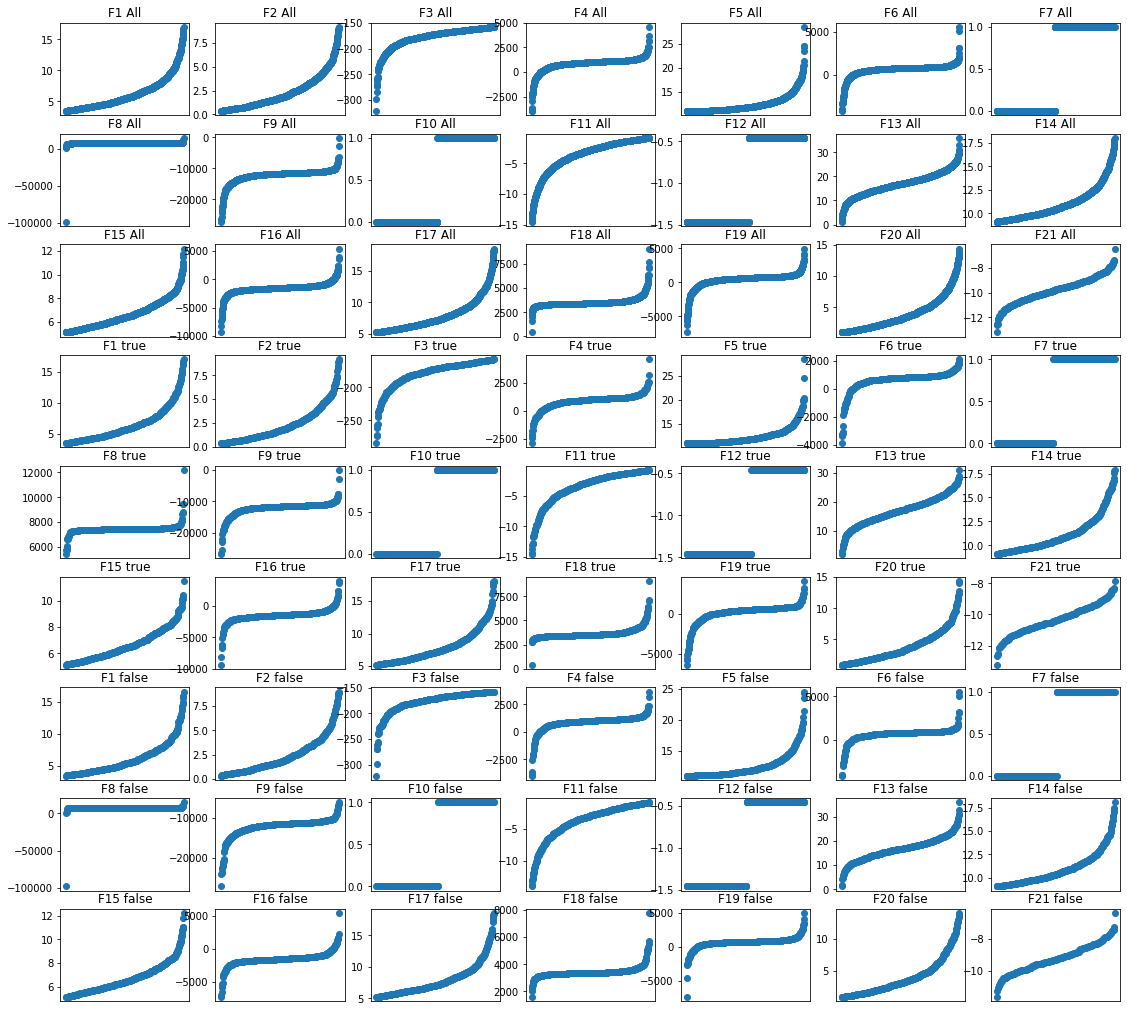

In [93]:
show_all_data_curves(_all_data_inputs, _all_data_classes, all_data.columns)
""

#### Attempting to perform some normalization on the data, despite your lack of labels for the data

Here is a quick test of some gaussian normalization, to get every datapoint in the range 0-1.

This is effectively a sanity check, **NOT THE FINAL NORMALIZATION**, because the normalization will be
repeated for each fold in K-fold cross validation. But using this function.

''

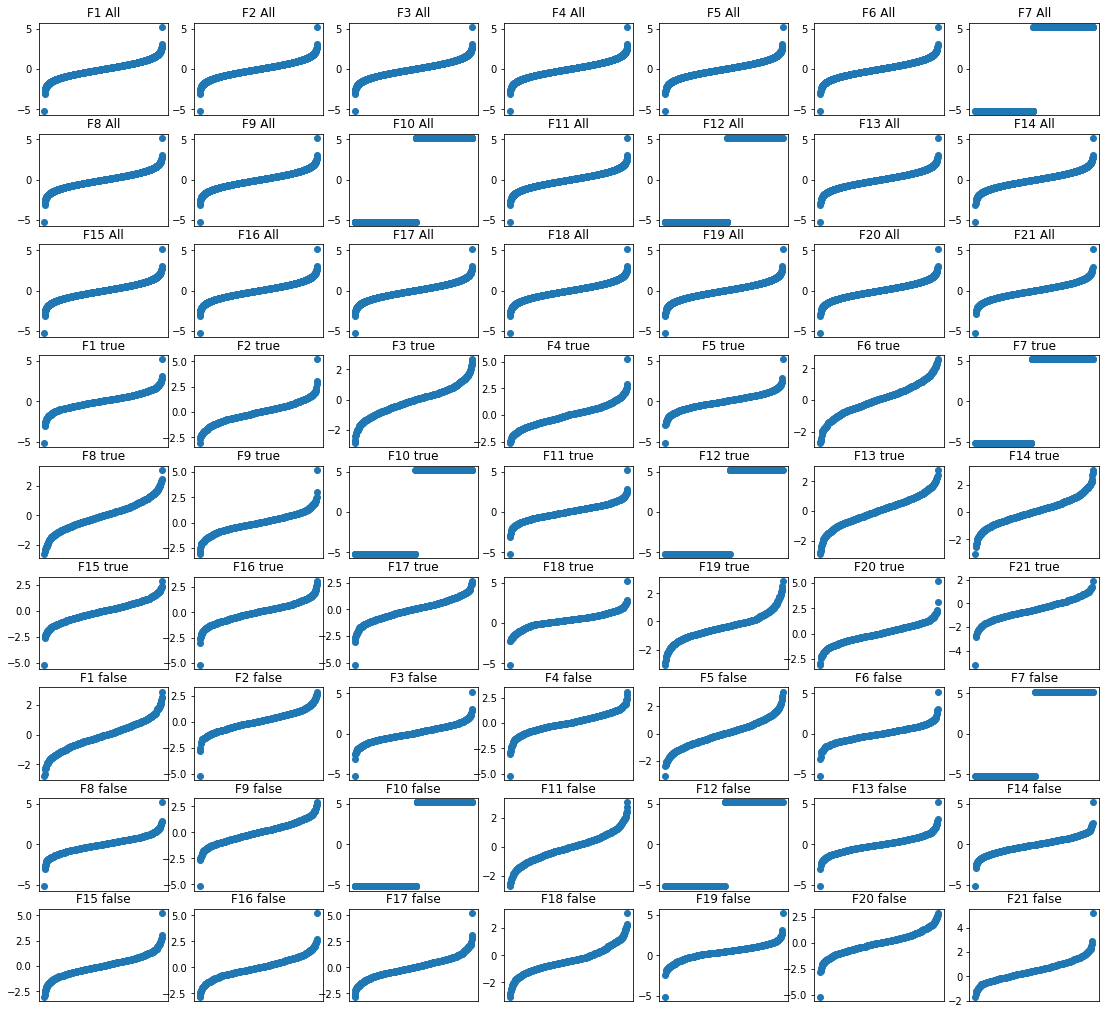

In [94]:
from sklearn.preprocessing import QuantileTransformer
_qt: QuantileTransformer = QuantileTransformer(output_distribution="normal")

_transform_inputs: np.ndarray = _qt.fit_transform(_all_data_inputs)

show_all_data_curves(_transform_inputs, _all_data_classes, all_data.columns)
""

In [115]:
from sklearn.preprocessing import MinMaxScaler

#_mms: MinMaxScaler = MinMaxScaler()

#_mms_t_ins: np.ndarray = _mms.fit_transform(_transform_inputs)

#show_all_data_curves(_mms_t_ins, _all_data_classes, all_data.columns, show_all_details=False)
""

''

# Obtaining a validation set

In this code cell, I am splitting the given data into a validation set of 100 indices, and a training set of 900 indices.

The training set will be used in the actual k-fold stuff.

In [105]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

validation_cv: StratifiedKFold = StratifiedKFold(n_splits=10, shuffle=True)

all_train_indices, validation_indices = [i for i in validation_cv.split(_all_data_inputs, _all_data_classes)][0]

validation_df: pd.DataFrame = all_data.iloc[validation_indices]


train_df: pd.DataFrame = all_data.iloc[all_train_indices]

print("validation")
print(validation_df.head())
print(validation_df.shape)
print("train")
print(train_df.head())
print(train_df.shape)


validation
        F1      F2       F3         F4        F5        F6  F7       F8  \
2   4.3035  2.4680 -193.920  1155.9300  15.23100  1343.670   1  7259.70   
7   7.4160  0.5644 -162.970   290.2700  11.05443   774.720   0  7554.80   
34  3.6867  1.8562 -170.266  1176.4700  13.11630   861.492   1  7426.68   
43  8.3550  1.9458 -174.428  1059.6151  13.60920   909.930   0  7466.28   
46  7.5090  2.7280 -168.464   600.2700  11.28831 -3392.430   0  7458.28   

          F9  F10  ...      F13      F14      F15      F16       F17      F18  \
2  -12901.92    1  ...  12.2840  10.2526  9.35200 -1318.32   5.32809  4573.64   
7  -10813.92    1  ...  11.6110  10.3890  9.39600 -1148.12   5.85660  3098.64   
34 -21940.92    1  ...  19.3710  10.9040  7.00100 -1951.92  10.38300  3338.51   
43 -11679.12    0  ...  17.8875  12.6080  5.25578 -1454.52   7.86480  3578.44   
46 -12209.82    1  ...  25.8340  11.0540  8.28200 -2031.52  10.38900  3436.85   

       F19      F20    F21  Class  
2   865.67  1.3

# Decision Trees

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from typing import List
from sklearn.pipeline import Pipeline

skf: StratifiedKFold = StratifiedKFold(shuffle=True, n_splits=9)

treepl: Pipeline = Pipeline([
    ("imputer", KNNImputer(weights="distance", add_indicator=True)),
    ("scaler", QuantileTransformer(output_distribution="normal")),
    ("classifier", DecisionTreeClassifier())
])


treePipelines: List[Pipeline] = []

scores = cross_validate()

for train, test in skf.split(train_df):
    train_data: np.ndarray = train.loc[:, train.columns != 'Class'].to_numpy()
    train_labels: np.ndarray = train.loc[:, 'Class'].to_numpy()

    test_data: np.ndarray = test.loc[:, test.columns != "Class"].to_numpy()
    test_labels: np.ndarray = test.loc[:,"class"].to_numpy()

    clfpip: Pipeline = treepl.fit_transform(train_data, train_labels)

    out_labels: np.ndarray = clfpip.predict(test_labels)

    cross_val_score(c)


### Part B

In [ ]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

#predicted = ... # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
#test_df.iloc[:,-1] = predicted

# Save to the destination file
#test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
#assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])